In [1]:
from helper import *
import warnings
from PIL import Image
from wordcloud import WordCloud as wd, ImageColorGenerator
warnings.filterwarnings('ignore')
from pprint import pprint
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import operator
import numpy as np
import pandas as pd

In [2]:
fo = pd.ExcelFile('cleandataprabowo.xlsx')
df = pd.read_excel(fo, 'Sheet1')

text_p = df['text']
text_list_p =  [i.split() for i in text_p]
print(len(text_list_p))

1307


In [3]:
fo = pd.ExcelFile('cleandatajokowi.xlsx')
df = pd.read_excel(fo, 'Sheet1')

text_j = df['text']
text_list_j =  [i.split() for i in text_j]
print(len(text_list_j))

1274


In [4]:
#Create Biagram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list_p, min_count=5)    #dia dijadikan satu kata, ketika ada dua kata yang kemunculannya minimal 10 kali
trigram = Phrases(bigram[text_list_p], min_count=10)

for idx in range(len(text_list_p)):
    for token in bigram[text_list_p[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list_p[idx].append(token)
    for token in trigram[text_list_p[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list_p[idx].append(token)

In [5]:
#Create Biagram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list_j, min_count=5)    #dia dijadikan satu kata, ketika ada dua kata yang kemunculannya minimal 10 kali
trigram = Phrases(bigram[text_list_j], min_count=10)

for idx in range(len(text_list_j)):
    for token in bigram[text_list_j[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list_j[idx].append(token)
    for token in trigram[text_list_j[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list_j[idx].append(token)

In [6]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary_j = corpora.Dictionary(text_list_j)
dictionary_j.filter_extremes(no_below=5, no_above=0.2)# no_below kemunculan ga boleh dibawah 5, 
print(dictionary_j)

dictionary_p = corpora.Dictionary(text_list_p)
dictionary_p.filter_extremes(no_below=5, no_above=0.2)# no_below kemunculan ga boleh dibawah 5, 
print(dictionary_p)

Dictionary(326 unique tokens: ['dicintai', 'dukungan', 'bilang', 'nomor', 'berharga']...)
Dictionary(272 unique tokens: ['pemilihan', 'pemilihan_umum', 'umum', 'berhasil', 'nama']...)


In [7]:
#build corpus
doc_term_matrix_j = [dictionary_j.doc2bow(doc) for doc in text_list_j]

print(len(doc_term_matrix_j))
print(doc_term_matrix_j[90])

tfidf_j = models.TfidfModel(doc_term_matrix_j)
corpus_tfidf_j = tfidf_j[doc_term_matrix_j]

doc_term_matrix_p = [dictionary_p.doc2bow(doc) for doc in text_list_p]

print(len(doc_term_matrix_p))
print(doc_term_matrix_p[90])

tfidf_p = models.TfidfModel(doc_term_matrix_p)
corpus_tfidf_p = tfidf_p[doc_term_matrix_p]

1274
[(140, 1)]
1307
[(84, 1)]


In [8]:
#----------------------------------------------------- LSI -------------------------------------------------------------------#

In [9]:
def compute_coherence_values_lsi(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LsiModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)#membangun model dengan LSI
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')#menggunakan coherence tipe cv
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

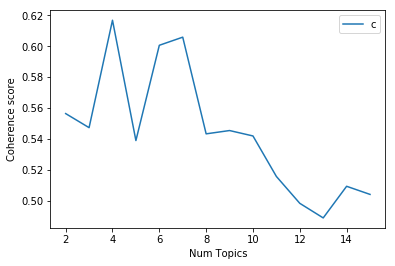

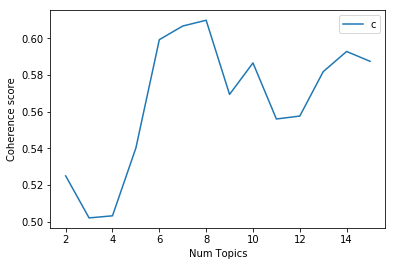

In [11]:
start=2
limit=16
step=1
model_list_j, coherence_values_j = compute_coherence_values_lsi(dictionary=dictionary_j, corpus=corpus_tfidf_j, 
                                                        texts=text_list_j, start=start, limit=limit, step=step)
model_list_p, coherence_values_p = compute_coherence_values_lsi(dictionary=dictionary_p, corpus=corpus_tfidf_p, 
                                                        texts=text_list_p, start=start, limit=limit, step=step)
#show graphs LSI
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values_j)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

x = range(start, limit, step)
plt.plot(x, coherence_values_p)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [12]:
print("COHERENCE VALUE JOKOWI")
for m, cv in zip(x, coherence_values_j):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))#semakin nilai coherence nya tinggi , banyak topik semakin baik, semakin sesuai jumlah topiknya

print("")    
print("COHERENCE VALUE PRABOWO")    
for m, cv in zip(x, coherence_values_p):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))#semakin nilai coherence nya tinggi , banyak topik semakin baik, semakin sesuai jumlah topiknya

COHERENCE VALUE JOKOWI
Num Topics = 2  has Coherence Value of 0.5564
Num Topics = 3  has Coherence Value of 0.5473
Num Topics = 4  has Coherence Value of 0.6169
Num Topics = 5  has Coherence Value of 0.5389
Num Topics = 6  has Coherence Value of 0.6006
Num Topics = 7  has Coherence Value of 0.6059
Num Topics = 8  has Coherence Value of 0.5433
Num Topics = 9  has Coherence Value of 0.5454
Num Topics = 10  has Coherence Value of 0.5419
Num Topics = 11  has Coherence Value of 0.5157
Num Topics = 12  has Coherence Value of 0.4982
Num Topics = 13  has Coherence Value of 0.4888
Num Topics = 14  has Coherence Value of 0.5093
Num Topics = 15  has Coherence Value of 0.504

COHERENCE VALUE PRABOWO
Num Topics = 2  has Coherence Value of 0.525
Num Topics = 3  has Coherence Value of 0.5021
Num Topics = 4  has Coherence Value of 0.5032
Num Topics = 5  has Coherence Value of 0.5403
Num Topics = 6  has Coherence Value of 0.5993
Num Topics = 7  has Coherence Value of 0.6067
Num Topics = 8  has Coherenc

In [13]:
from pprint import pprint

model_j = LsiModel(corpus=corpus_tfidf_j, id2word=dictionary_j, num_topics=4)#kenapa 8 karena nilai cohorence nya paling tinggi
model_p = LsiModel(corpus=corpus_tfidf_p, id2word=dictionary_p, num_topics=8)#kenapa 8 karena nilai cohorence nya paling tinggi

In [14]:
for idx, topic in model_j.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

print("")
for idx, topic in model_p.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.872*"cinta" + 0.437*"rakyat" + 0.134*"indonesia" + 0.083*"tulus" + 0.068*"bukti" + 0.048*"pemimpin" + 0.036*"penuh_cinta" + 0.034*"presiden" + 0.034*"dicintai" + 0.034*"penuh"
Topic: 1 Word: 0.790*"rakyat" + -0.452*"cinta" + 0.306*"fakta" + 0.138*"indonesia" + 0.093*"dicintai" + 0.085*"pemimpin" + 0.082*"presiden" + 0.069*"kecintaan" + 0.054*"kamisjokowioptimis" + 0.043*"nkri"
Topic: 2 Word: 0.763*"fakta" + 0.437*"indonesia" + -0.361*"rakyat" + 0.140*"kamisjokowioptimis" + 0.112*"presiden" + 0.096*"juta" + 0.080*"cinta" + 0.074*"pembangunan" + 0.066*"masyarakat" + 0.056*"isu_bohong"
Topic: 3 Word: -0.739*"indonesia" + 0.499*"fakta" + -0.342*"presiden" + 0.100*"cinta" + -0.096*"maju" + 0.095*"kamisjokowioptimis" + -0.071*"masyarakat" + -0.066*"pemimpin" + -0.055*"pembangunan" + -0.050*"bangsa"

Topic: 0 Word: 0.925*"prabowo_sandi" + 0.300*"sandi" + 0.106*"isu_bohong" + 0.071*"pemilihan_presiden" + 0.065*"menang" + 0.050*"sby" + 0.045*"jokowi" + 0.045*"tim" + 0.043*"boho

In [15]:
lsitopics_j = model_j.show_topics(formatted=False)
lsitopics_p = model_p.show_topics(formatted=False)

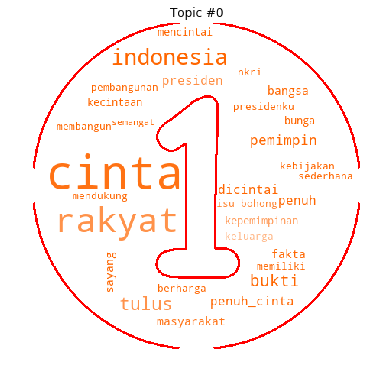

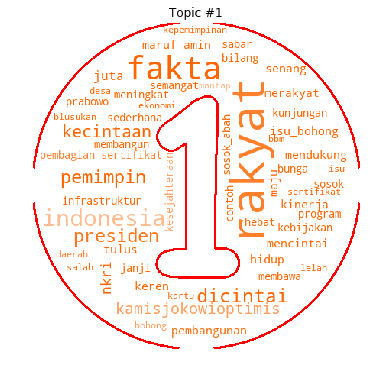

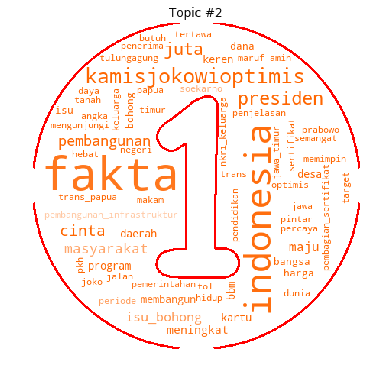

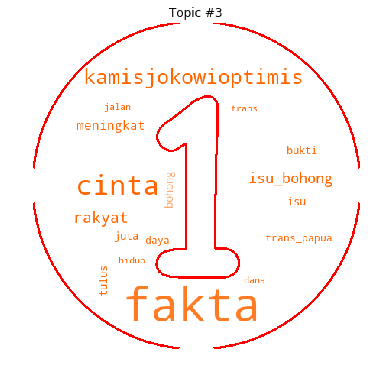

In [16]:
out_mask = np.array(Image.open('1.jpg'))  #sebisa mungkin jangan png
imgcolor = ImageColorGenerator(out_mask)

for t in range(model_j.num_topics):
    plt.figure(figsize=(7,6))
    plt.imshow(wd(max_font_size=60, min_font_size=12, background_color="white", mask=out_mask, contour_width=3, contour_color='red', color_func=imgcolor).fit_words(dict(model_j.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.savefig("LSI-JOKOWI-#"+ str(t) +".png", facecolor='k',bbox_inches='tight')
plt.show()

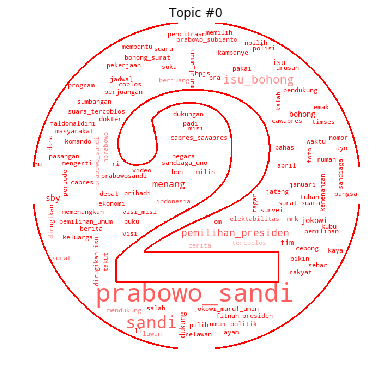

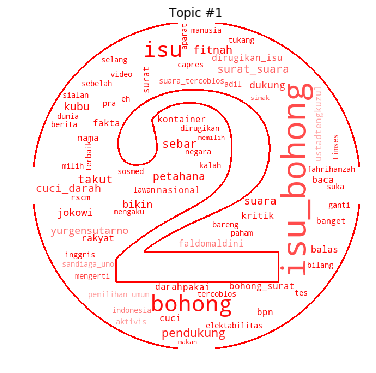

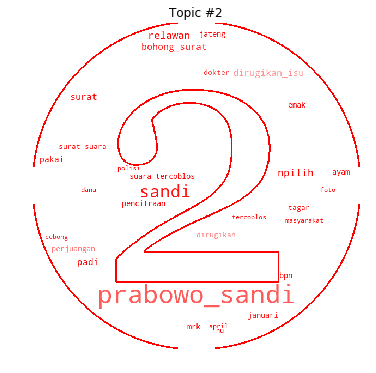

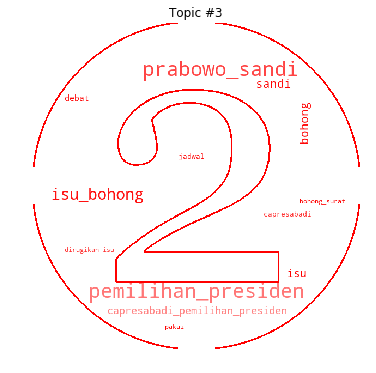

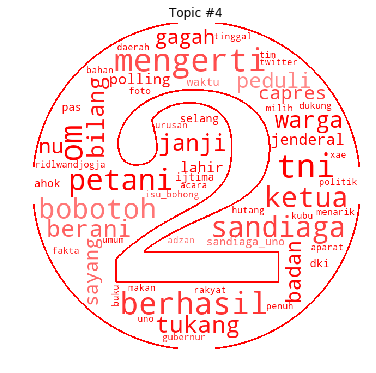

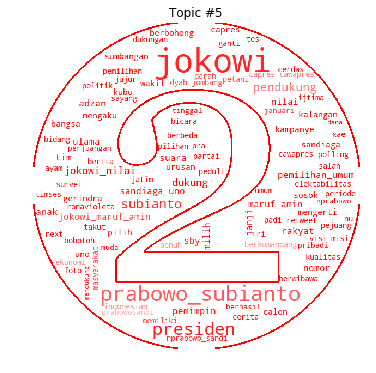

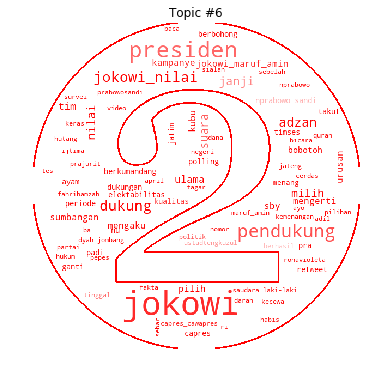

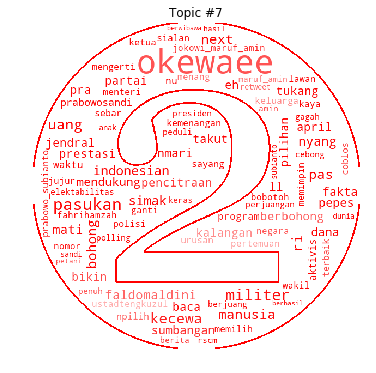

In [17]:
out_mask = np.array(Image.open('2.jpg'))  #sebisa mungkin jangan png
imgcolor = ImageColorGenerator(out_mask)

for t in range(model_p.num_topics):
    plt.figure(figsize=(7,6))
    plt.imshow(wd(max_font_size=60, min_font_size=12, background_color="white", mask=out_mask, contour_width=3, contour_color='red', color_func=imgcolor).fit_words(dict(model_p.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.savefig("LSI-PRABOWO-#"+ str(t) +".png", facecolor='k',bbox_inches='tight')
plt.show()

In [18]:
#-------------------------------------------------------LDA--------------------------------------------------------------------#

In [19]:
def compute_coherence_values_lda(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []  
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100) #membangun model LDAnya, iterasinya bebas kita mau set berapa
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

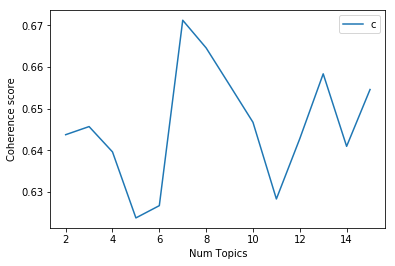

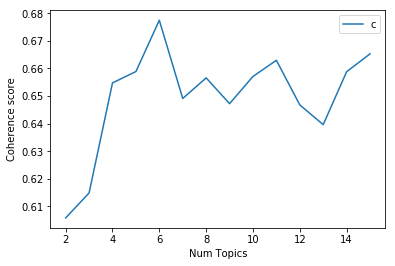

In [21]:
start=2
limit=16
step=1
model_list_j, coherence_values_j = compute_coherence_values_lda(dictionary=dictionary_j, corpus=corpus_tfidf_j, 
                                                        texts=text_list_j, start=start, limit=limit, step=step)
model_list_p, coherence_values_p = compute_coherence_values_lda(dictionary=dictionary_p, corpus=corpus_tfidf_p, 
                                                        texts=text_list_p, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values_j)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values_p)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [22]:
# Print the coherence scores
for m, cv in zip(x, coherence_values_j):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
print("")    
for m, cv in zip(x, coherence_values_p):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.6437
Num Topics = 3  has Coherence Value of 0.6457
Num Topics = 4  has Coherence Value of 0.6396
Num Topics = 5  has Coherence Value of 0.6237
Num Topics = 6  has Coherence Value of 0.6267
Num Topics = 7  has Coherence Value of 0.6712
Num Topics = 8  has Coherence Value of 0.6646
Num Topics = 9  has Coherence Value of 0.6557
Num Topics = 10  has Coherence Value of 0.6467
Num Topics = 11  has Coherence Value of 0.6283
Num Topics = 12  has Coherence Value of 0.6428
Num Topics = 13  has Coherence Value of 0.6583
Num Topics = 14  has Coherence Value of 0.6409
Num Topics = 15  has Coherence Value of 0.6546

Num Topics = 2  has Coherence Value of 0.6058
Num Topics = 3  has Coherence Value of 0.6148
Num Topics = 4  has Coherence Value of 0.6548
Num Topics = 5  has Coherence Value of 0.6589
Num Topics = 6  has Coherence Value of 0.6775
Num Topics = 7  has Coherence Value of 0.6491
Num Topics = 8  has Coherence Value of 0.6566
Num Topics = 9  has Coheren

In [23]:
from pprint import pprint

model_j = LdaModel(corpus=corpus_tfidf_j, id2word=dictionary_j, num_topics=7)
pprint(model_j.print_topics())

print("")
model_p = LdaModel(corpus=corpus_tfidf_p, id2word=dictionary_p, num_topics=6)
pprint(model_p.print_topics())

[(0,
  '0.020*"jawa_timur" + 0.018*"bencana" + 0.017*"banget" + 0.017*"terbaik" + '
  '0.015*"jokowilagi_jokowiharapanpasti" + 0.015*"hebat" + '
  '0.013*"pemerintahan" + 0.013*"tulus" + 0.013*"jokowiharapanpasti" + '
  '0.013*"indonesia"'),
 (1,
  '0.135*"cinta" + 0.032*"bukti" + 0.026*"juta" + 0.026*"keren" + '
  '0.023*"indonesia" + 0.018*"oke" + 0.018*"keluarga" + 0.017*"rakyat" + '
  '0.015*"hasil" + 0.015*"berharga"'),
 (2,
  '0.061*"presiden" + 0.025*"rakyat" + 0.022*"mantap" + 0.021*"karangan_bunga" '
  '+ 0.019*"terbaik" + 0.019*"contoh" + 0.018*"indonesia" + '
  '0.016*"kepemimpinan" + 0.016*"ayo" + 0.013*"tanah"'),
 (3,
  '0.063*"indonesia" + 0.027*"love" + 0.026*"makam_karno" + 0.023*"bangga" + '
  '0.022*"maju" + 0.018*"pembangunan" + 0.017*"maruf_amin" + 0.015*"dukung" + '
  '0.015*"makam" + 0.014*"semangat"'),
 (4,
  '0.039*"fakta" + 0.028*"isu_bohong" + 0.023*"pemimpin" + 0.018*"bohong" + '
  '0.016*"mencintai" + 0.014*"isu" + 0.014*"kecewa" + 0.014*"rakyat" + '
  '0.01

In [24]:
for idx, topic_j in model_j.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic_j))
    
print("")    
for idx, topic_p in model_p.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic_p))

Topic: 0 Word: 0.020*"jawa_timur" + 0.018*"bencana" + 0.017*"banget" + 0.017*"terbaik" + 0.015*"jokowilagi_jokowiharapanpasti" + 0.015*"hebat" + 0.013*"pemerintahan" + 0.013*"tulus" + 0.013*"jokowiharapanpasti" + 0.013*"indonesia"
Topic: 1 Word: 0.135*"cinta" + 0.032*"bukti" + 0.026*"juta" + 0.026*"keren" + 0.023*"indonesia" + 0.018*"oke" + 0.018*"keluarga" + 0.017*"rakyat" + 0.015*"hasil" + 0.015*"berharga"
Topic: 2 Word: 0.061*"presiden" + 0.025*"rakyat" + 0.022*"mantap" + 0.021*"karangan_bunga" + 0.019*"terbaik" + 0.019*"contoh" + 0.018*"indonesia" + 0.016*"kepemimpinan" + 0.016*"ayo" + 0.013*"tanah"
Topic: 3 Word: 0.063*"indonesia" + 0.027*"love" + 0.026*"makam_karno" + 0.023*"bangga" + 0.022*"maju" + 0.018*"pembangunan" + 0.017*"maruf_amin" + 0.015*"dukung" + 0.015*"makam" + 0.014*"semangat"
Topic: 4 Word: 0.039*"fakta" + 0.028*"isu_bohong" + 0.023*"pemimpin" + 0.018*"bohong" + 0.016*"mencintai" + 0.014*"isu" + 0.014*"kecewa" + 0.014*"rakyat" + 0.012*"nkri" + 0.012*"lakukan"
Topic

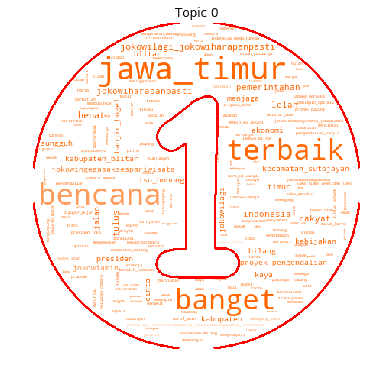

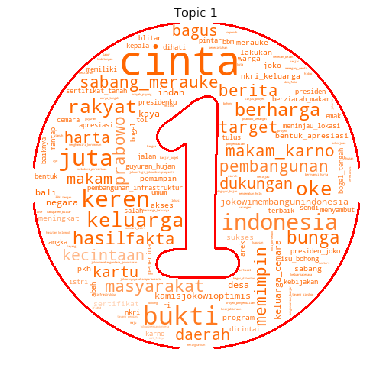

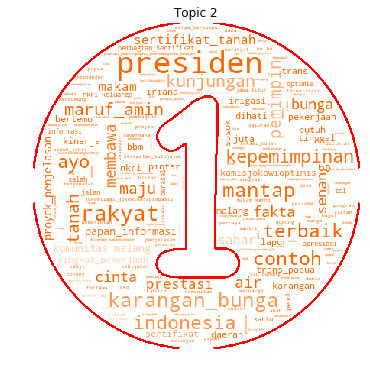

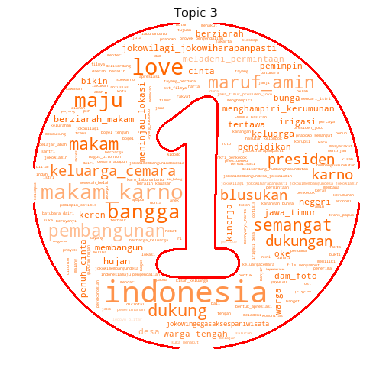

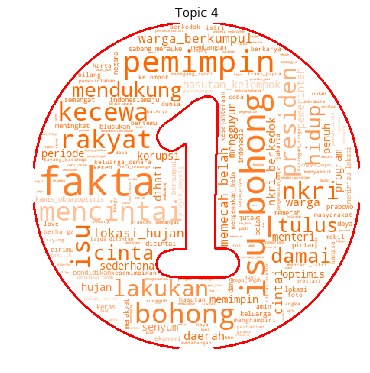

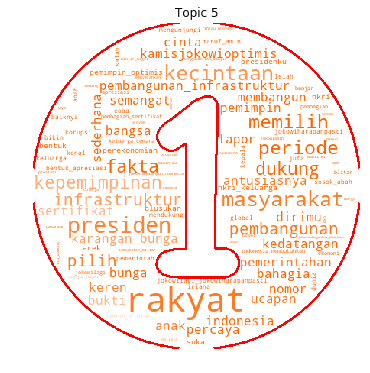

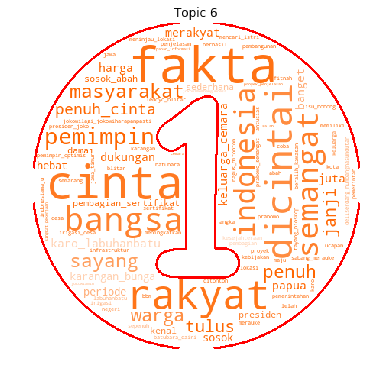

In [25]:
from wordcloud import WordCloud as wd, ImageColorGenerator
import matplotlib.pyplot as plt 
from PIL import Image
import numpy as np

out_mask = np.array(Image.open('1.jpg'))  #sebisa mungkin jangan png
imgcolor = ImageColorGenerator(out_mask)

for t in range(model_j.num_topics):
    plt.figure(figsize=(7,6))
    plt.imshow(wd(
        width = 512,
        height = 512,
        background_color='white',
        mask=out_mask,
        contour_width=3,
        contour_color='red',
        color_func=imgcolor).fit_words(dict(model_j.show_topic(t,300))))
    plt.axis("off")
    plt.title("Topic "+str(t))
    plt.savefig("LDA-JOKOWI-#"+str(t)+".png", facecolor='k', bbox_inches='tight')

plt.show()

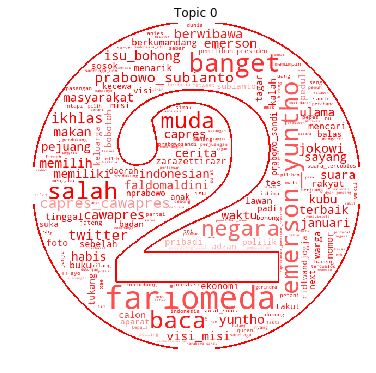

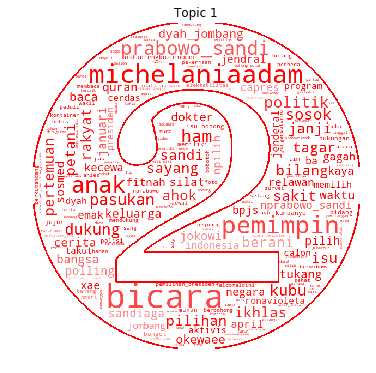

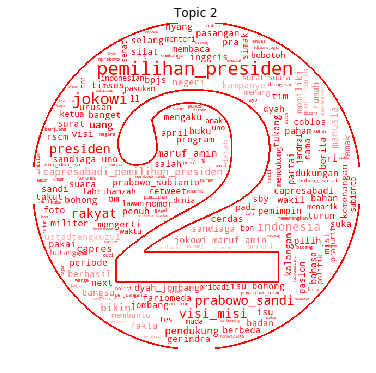

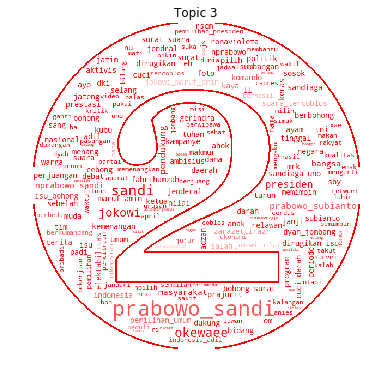

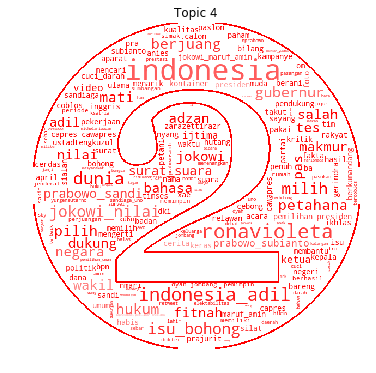

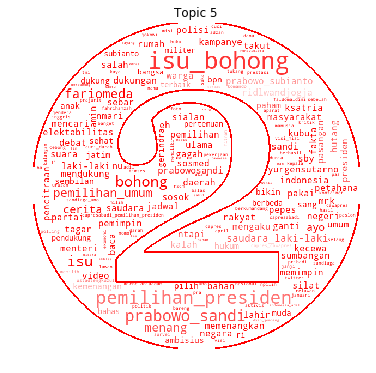

In [26]:
from wordcloud import WordCloud as wd, ImageColorGenerator
import matplotlib.pyplot as plt 
from PIL import Image
import numpy as np

out_mask = np.array(Image.open('2.jpg'))  #sebisa mungkin jangan png
imgcolor = ImageColorGenerator(out_mask)

for t in range(model_p.num_topics):
    plt.figure(figsize=(7,6))
    plt.imshow(wd(
        width = 512,
        height = 512,
        background_color='white',
        mask=out_mask,
        contour_width=3,
        contour_color='red',
        color_func=imgcolor).fit_words(dict(model_p.show_topic(t,300))))
    plt.axis("off")
    plt.title("Topic "+str(t))
    plt.savefig("LDA-PRABOWO-#"+str(t)+".png", facecolor='k', bbox_inches='tight')

plt.show()